## EDA on White Wine Data Set

This notebook will be featuring the exploratory data analysis on the white wine dataset with visualization.

In [1]:
#Importing the libraries
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
#Path where the dataset is saved
file_path = r"C:\data\winequality-white.csv"

In [3]:
#Load the dataset as a pandas dataframe
wine_data = pd.read_csv(file_path, delimiter=';', header=0)

In [4]:
#Assign column names
wine_data.columns = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol','quality']

### Examining the data

In [5]:
#View dataframe
wine_data.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


### Examine the column , their dtypes and the number of records

In [6]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


### Check for duplicate records 

In [7]:
# Check the total number of duplicate records
wine_data.duplicated().sum()

937

### Let us take a summary of the target variable

In [8]:
# Summarize the target variable
wine_data.quality.describe()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

### Understanding the target variable

In [9]:
#check the number of unique values in the target
wine_data.quality.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

#### As we can see from above the 'quality' of wine ranges from 3 to 9

<AxesSubplot:xlabel='quality'>

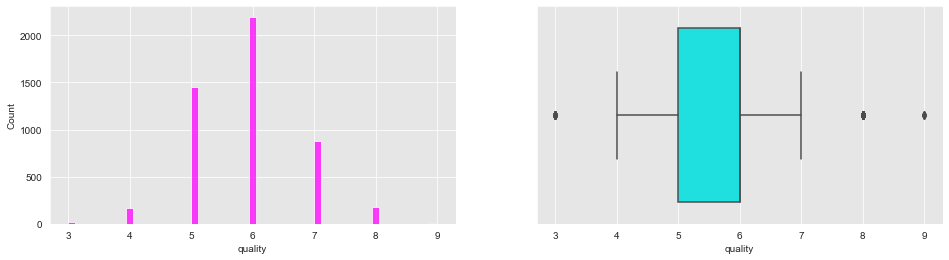

In [10]:
plt.figure(figsize = (16, 4))
sn.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.subplot(1,2,1)
sn.histplot(wine_data.quality, color = 'magenta')
plt.subplot(1,2,2)
sn.boxplot(wine_data.quality, color = 'cyan')

#### Most of the wine are in the quality range of 4 to 7. More than 2000 instances of the wine are having the a quality of 6.

### Use the IQR rule to determine the outliers

In [11]:
stat_values = wine_data.quality.describe()

In [12]:
IQR = stat_values['75%'] - stat_values['25%']
higher = stat_values['75%'] + 1.5 * IQR
lower = stat_values['25%'] - 1.5 * IQR
print("The outliers lie above the value {} and below the value {}". format(higher, lower))

The outliers lie above the value 7.5 and below the value 3.5


### Let us look at the upperbound and lowerbound outliers 

In [13]:
wine_data[wine_data['quality']> 7.5]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
17,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
20,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
22,6.8,0.260,0.42,1.7,0.049,41.0,122.0,0.99300,3.47,0.48,10.5,8
68,6.7,0.230,0.31,2.1,0.046,30.0,96.0,0.99260,3.33,0.64,10.7,8
74,6.7,0.230,0.31,2.1,0.046,30.0,96.0,0.99260,3.33,0.64,10.7,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4765,5.2,0.300,0.34,1.5,0.038,18.0,96.0,0.98942,3.56,0.48,13.0,8
4766,6.4,0.320,0.25,5.0,0.055,28.0,138.0,0.99171,3.27,0.50,12.4,8
4786,4.4,0.320,0.39,4.3,0.030,31.0,127.0,0.98904,3.46,0.36,12.8,8
4787,3.9,0.225,0.40,4.2,0.030,29.0,118.0,0.98900,3.57,0.36,12.8,8


In [14]:
wine_data[wine_data['quality']< 3.5]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
251,8.5,0.260,0.21,16.20,0.074,41.0,197.0,0.99800,3.02,0.50,9.8,3
253,5.8,0.240,0.44,3.50,0.029,5.0,109.0,0.99130,3.53,0.43,11.7,3
294,9.1,0.590,0.38,1.60,0.066,34.0,182.0,0.99680,3.23,0.38,8.5,3
445,7.1,0.320,0.32,11.00,0.038,16.0,66.0,0.99370,3.24,0.40,11.5,3
740,6.9,0.390,0.40,4.60,0.022,5.0,19.0,0.99150,3.31,0.37,12.6,3
873,10.3,0.170,0.47,1.40,0.037,5.0,33.0,0.99390,2.89,0.28,9.6,3
1034,7.9,0.640,0.46,10.60,0.244,33.0,227.0,0.99830,2.87,0.74,9.1,3
1229,8.3,0.330,0.42,1.15,0.033,18.0,96.0,0.99110,3.20,0.32,12.4,3
1417,8.6,0.550,0.35,15.55,0.057,35.5,366.5,1.00010,3.04,0.63,11.0,3
1484,7.5,0.320,0.24,4.60,0.053,8.0,134.0,0.99580,3.14,0.50,9.1,3


### Understanding the attributes and their relationship with the target variable

In [15]:
def box_plt(col):
    x = wine_data['quality'].tolist()
    y = wine_data[col].tolist()
    plt.figure(figsize = (6, 6))
    plt.ylabel(col)
    plt.xlabel('quality')
    sn.boxplot(x, y)

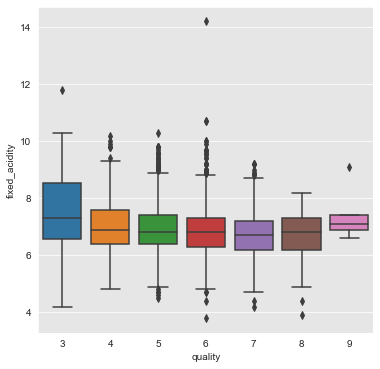

In [16]:
box_plt('fixed_acidity')

#### From the above plot we can infer that the attribute fixed_acidity has a weak association with quality of wine.

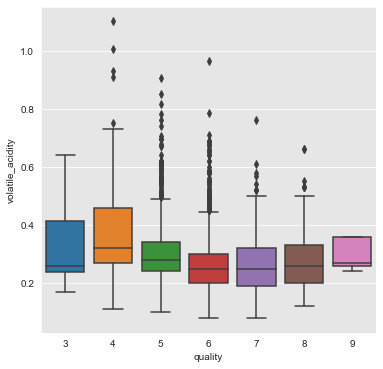

In [17]:
box_plt('volatile_acidity')

#### From the above plot we can infer that the attribute volatile_acidity has some association with quality of wine.

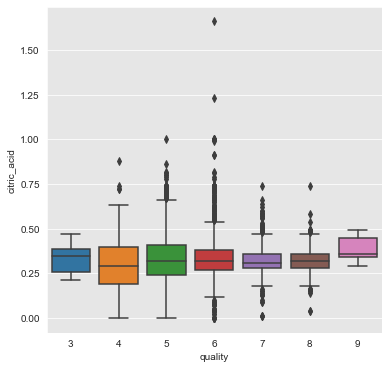

In [18]:
box_plt('citric_acid')

#### From the above plot we can infer that the attribute citric_acid has somewhat positive association with quality of wine.

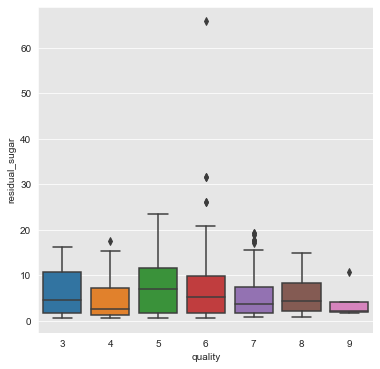

In [19]:
box_plt('residual_sugar')

#### From the above plot we can infer that the attribute residual_sugar has a weak association with quality of wine.

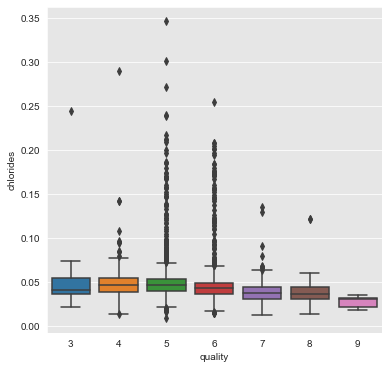

In [20]:
box_plt('chlorides')

#### From the above plot we can infer that the attribute chlorides has a negative association with quality of wine.

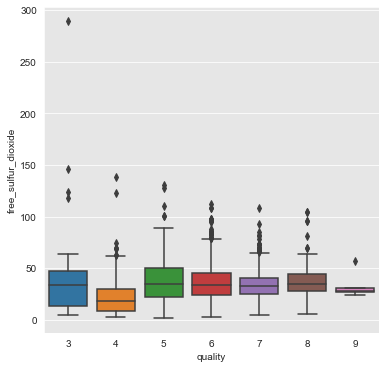

In [21]:
box_plt('free_sulfur_dioxide')

#### From the above plot we can infer that the attribute free_sulfur_dioxide has a weak association with quality of wine.

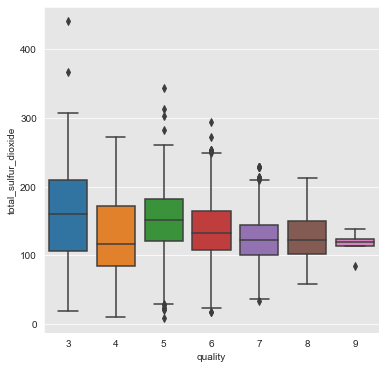

In [22]:
box_plt('total_sulfur_dioxide')

#### From the above plot we can infer that the attribute total_sulfur_dioxide has somewhat negative association with quality of wine.

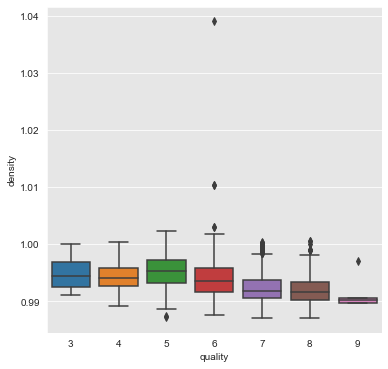

In [23]:
box_plt('density')

#### From the above plot we can infer that the attribute density has a negative association with quality of wine.

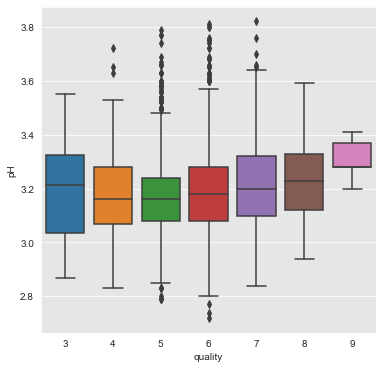

In [24]:
box_plt('pH')

#### From the above plot we can infer that the attribute pH has a positive association with quality of wine.

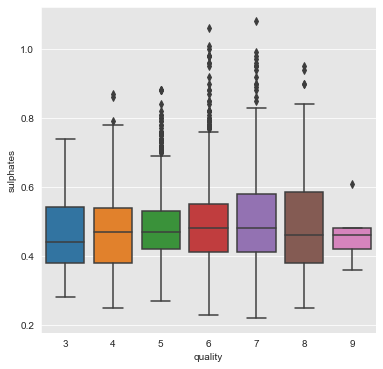

In [25]:
box_plt('sulphates')

#### From the above plot we can infer that the attribute sulphates has a weak association with quality of wine.

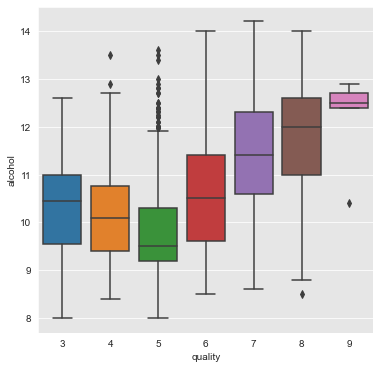

In [26]:
box_plt('alcohol')

#### From the above plot we can infer that the attribute alcohol has a positive association with quality of wine.

### Visualize the correlation matrix

Let us try and examine the correlation between variables and quality of the wine

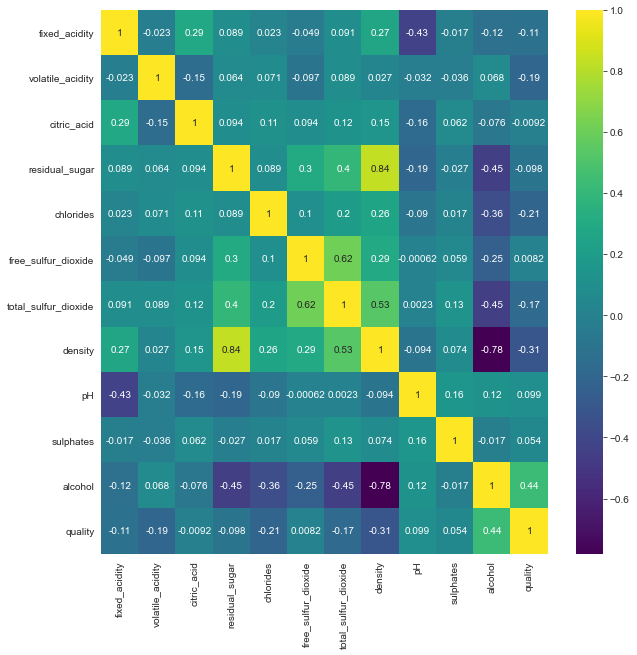

In [27]:
#Create a correlation matrix
corrMatrix = wine_data.corr()


#visualize as correlation matrix heatmap
fig= plt.figure(figsize=(10,10))
sn.heatmap(corrMatrix, annot=True, cmap= 'viridis')
plt.show()

### Analysis of the Correlation Matrix

From the correlation values we can infer that:
1. The variable alcohol has moderate positive correlation to the wine quality. 
2. The variable density has moderate negative correlation to the wine quality.
3. There is a high positive correletion between density and residual sugar.
4. Total sulphur dioxide and free sulphur dioxide have a positive correlation.

### Now since we have gained the understanding about the attributes and the target variable through the EDA, we can move ahead and try various Machine Learning Algorithms to design a system to predict the quality of wine.

The continuation will be found in the notebook - 01_ModelTesting.ipynb